In [1]:
import pandas as pd
import seaborn as sns
import os 

In [18]:
os.getcwd()

'/Users/venkat'

In [19]:
os.chdir('/Users/venkat/Documents')

In [20]:
# Accessing the dataset that provides details about CO2 emissions
co2_data = pd.read_csv('co2_emission.csv')

In [25]:
# Investigating the data
co2_data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [28]:
co2_data['Entity'].value_counts()

Statistical differences      267
Asia and Pacific (other)     267
EU-28                        267
Europe (other)               267
Americas (other)             267
                            ... 
Antarctic Fisheries           21
Wallis and Futuna Islands     17
Timor                         16
Christmas Island              14
Liechtenstein                 11
Name: Entity, Length: 233, dtype: int64

In [30]:
co2_data['Code'].value_counts()

OWID_WRL    267
USA         267
GBR         267
IND         256
CHN         254
           ... 
MHL          26
KGZ          26
TLS          16
CXR          14
LIE          11
Name: Code, Length: 222, dtype: int64

In [34]:
# The years range from 1751 to 2017
co2_data['Year'].sort_values()

19394    1751
20353    1751
19661    1751
1251     1751
9204     1751
         ... 
15193    2017
3498     2017
15341    2017
14436    2017
20852    2017
Name: Year, Length: 20853, dtype: int64

In [36]:
co2_data['Annual CO₂ emissions (tonnes )'].describe()

count    2.085300e+04
mean     1.930517e+08
std      1.345143e+09
min     -6.255223e+08
25%      3.187680e+05
50%      3.828880e+06
75%      3.706898e+07
max      3.615326e+10
Name: Annual CO₂ emissions (tonnes ), dtype: float64

In [37]:
co2_data.shape

(20853, 4)

In [53]:
# There are also calculations within the data
co2_data[co2_data['Annual CO₂ emissions (tonnes )']<0]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
17598,Statistical differences,NaN,1971,-2.937795e+07
17599,Statistical differences,NaN,1972,-1.327650e+08
17600,Statistical differences,NaN,1973,-1.219746e+08
17601,Statistical differences,NaN,1974,-1.784734e+07
17602,Statistical differences,NaN,1975,-9.373611e+07
17603,Statistical differences,NaN,1976,-1.300720e+07
17605,Statistical differences,NaN,1978,-4.183775e+08
17607,Statistical differences,NaN,1980,-9.108704e+06
17608,Statistical differences,NaN,1981,-8.579989e+07
17609,Statistical differences,NaN,1982,-1.104366e+08


In [61]:
# Since we are focusing only on the actual data per year, we can remove this data
new_data = co2_data[co2_data['Entity']!='Statistical differences']

In [68]:
# We can find what values are correlated with the annual CO2 emissions
# Entity and Code are basically the same
# year should have some correlation with emission increase
new_data.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

In [73]:
# Focusing on data in America specifically
us_data = new_data[new_data['Code']=='USA']

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Annual CO₂ emissions (tonnes )'>

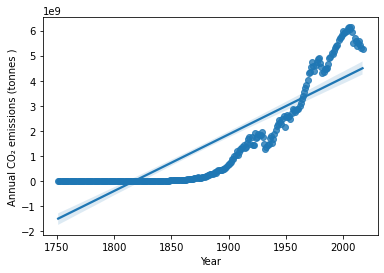

In [75]:
# There seems to be some correlation, but it is not a linear relationship
sns.regplot(us_data['Year'], us_data['Annual CO₂ emissions (tonnes )'])